In [13]:
import pandas as pd
import numpy as np

# Load the dataset using the provided file path
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel("C:/Users/year3/Downloads/dataset.xlsx")

# Separate the features and labels
features = data.iloc[:, :-1]
labels = data['LABEL']

# Calculate the intraclass spread (standard deviation within each class)
intraclass_spread = features.groupby(labels).std().mean()

# Calculate the interclass spread (spread between the means of different classes)
class_means = features.groupby(labels).mean()
interclass_spread = class_means.std()

# Output the results
print("Intraclass Spread:")
print(intraclass_spread)

print("\nInterclass Spread:")
print(interclass_spread)


Intraclass Spread:
0      3033.460386
1       140.198320
2       130.951098
3       513.797400
4       108.019241
          ...     
191      74.156458
192     246.353842
193     166.383245
194     195.990732
195     194.997639
Length: 196, dtype: float64

Interclass Spread:
0      10448.459018
1        154.116547
2        103.865835
3        683.838056
4         77.127189
           ...     
191       33.602350
192      171.690761
193       83.274651
194      108.662244
195      120.997630
Length: 196, dtype: float64


In [14]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel("C:/Users/year3/Downloads/dataset.xlsx")

# Separate the features and labels
features = data.iloc[:, :-1].values
labels = data['LABEL'].values

# Get the unique classes
classes = np.unique(labels)

# Initialize dictionaries to store centroids and spreads
centroids = {}
spreads = {}

# Calculate the mean (centroid) and spread for each class
for cls in classes:
    class_features = features[labels == cls]
    
    # Calculate the mean (centroid) for the class
    centroids[cls] = np.mean(class_features, axis=0)
    
    # Calculate the spread (standard deviation) for the class
    spreads[cls] = np.std(class_features, axis=0)

# Calculate the distance between mean vectors (centroids) of each pair of classes
distances = {}
for i, cls1 in enumerate(classes):
    for cls2 in classes[i+1:]:
        distance = np.linalg.norm(centroids[cls1] - centroids[cls2])
        distances[(cls1, cls2)] = distance

# Output the results
print("Class Centroids (Means):")
for cls, centroid in centroids.items():
    print(f"Class {cls}: {centroid}")

print("\nClass Spreads (Standard Deviations):")
for cls, spread in spreads.items():
    print(f"Class {cls}: {spread}")

print("\nDistances Between Class Centroids:")
for pair, distance in distances.items():
    print(f"Distance between class {pair[0]} and class {pair[1]}: {distance}")


Class Centroids (Means):
Class 3333: [ 3.50219715e+04  3.09444505e+01  3.94544340e+01  2.39719324e+03
  6.73416964e+01  2.57414194e+03 -1.68619915e+01  1.29005681e+01
  6.35060136e+00 -4.22674245e+01 -6.36430047e+02 -1.55073295e+02
 -2.44923726e+03 -1.48058617e+02 -9.78473386e+02 -8.97400280e+01
 -1.11563771e+02 -7.82612478e+01 -8.33186550e+01 -8.15555163e+01
 -5.71929161e+01 -7.43676790e+01  1.40504455e+02  4.65734123e+02
  2.87455679e+02  7.39386113e+02  7.82807609e+01  6.45908939e+01
  1.39873888e+02  1.22408121e+02  1.94961260e+02  2.65894077e+02
  2.16260295e+02  1.80612947e+02  9.37405289e+01  1.34293096e+02
  5.60480719e+01 -9.59279554e+01  1.68442699e+02 -2.31665243e+02
  1.34798573e+02 -1.69452056e+02  5.87672528e+01 -1.59803253e+01
  1.28935856e+02 -7.47109901e+01 -9.21034316e+01 -2.05635229e+02
 -2.41288107e+02 -2.47929468e+02 -2.53955201e+02 -2.10615586e+02
 -1.97115266e+02 -6.53642214e+01 -1.25903545e+02 -1.36206502e+02
  8.15607262e+01 -9.88268890e+01  1.67377520e+02 -2.2

Mean of the selected feature: 32263.612870626603
Variance of the selected feature: 19621535.756842762


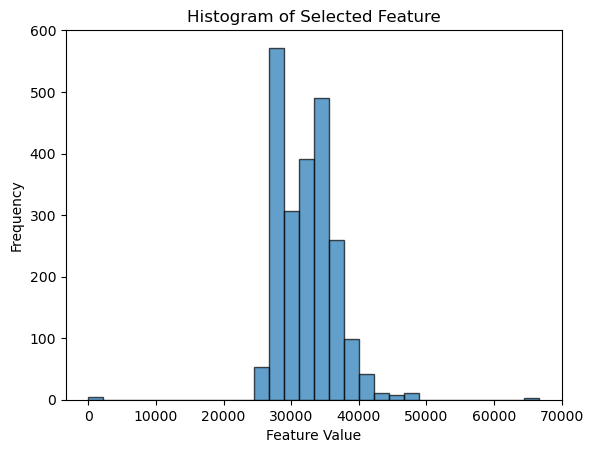

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel("C:/Users/year3/Downloads/dataset.xlsx")

# Select a feature (e.g., the first feature/column)
selected_feature = data.iloc[:, 0]  # Change the index to select a different feature

# Calculate the mean and variance of the selected feature
mean = np.mean(selected_feature)
variance = np.var(selected_feature)

# Print the mean and variance
print(f"Mean of the selected feature: {mean}")
print(f"Variance of the selected feature: {variance}")

# Generate and plot the histogram
plt.hist(selected_feature, bins=30, edgecolor='black', alpha=0.7)  # You can adjust the number of bins as needed
plt.title('Histogram of Selected Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()


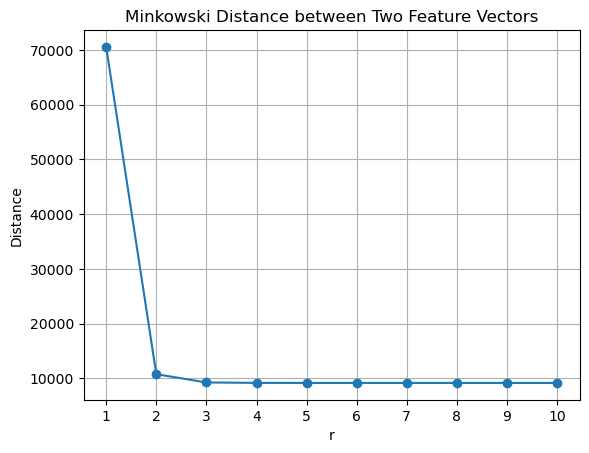

Minkowski distance with r=1: 70573.938249271
Minkowski distance with r=2: 10753.051704742427
Minkowski distance with r=3: 9241.241434540781
Minkowski distance with r=4: 9160.906404968428
Minkowski distance with r=5: 9155.410132490235
Minkowski distance with r=6: 9154.947436594834
Minkowski distance with r=7: 9154.90225066506
Minkowski distance with r=8: 9154.897358440983
Minkowski distance with r=9: 9154.896789621596
Minkowski distance with r=10: 9154.89672011521


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel("C:/Users/year3/Downloads/dataset.xlsx")

# Select two feature vectors (e.g., the first two rows)
vector1 = data.iloc[0, :-1].values  # Exclude the label column
vector2 = data.iloc[1, :-1].values  # Exclude the label column

# Function to calculate Minkowski distance
def minkowski_distance(vec1, vec2, r):
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1/r)

# Calculate Minkowski distance for r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

# Plot the Minkowski distance as a function of r
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r')
plt.ylabel('Distance')
plt.xticks(r_values)  # Set x-ticks to integers from 1 to 10
plt.grid(True)
plt.show()

# Print the distances for each r value
for r, dist in zip(r_values, distances):
    print(f"Minkowski distance with r={r}: {dist}")


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel("C:/Users/year3/Downloads/dataset.xlsx")

# Separate the features and labels
X = data.iloc[:, :-1].values  # All rows, all columns except the last (features)
y = data['LABEL'].values      # All rows, last column (labels)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1575, 196)
X_test shape: (675, 196)
y_train shape: (1575,)
y_test shape: (675,)


In [32]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = "C:/Users/year3/Downloads/dataset.xlsx"


try:
    # Load the dataset
    df = pd.read_excel(file_path)
    print("Data loaded successfully.")
    
    # Display the first few rows of the dataframe to understand its structure
    print(df.head())

    # Replace 'target_column' with the actual name of your target column
    # Replace 'feature_columns' with the actual names of your feature columns
    # For example: X = df[['feature1', 'feature2']] and y = df['target_column']
    
    # If column names are numbers or you don't have headers in the file, use index-based access
    # For example: X = df.iloc[:, :-1] and y = df.iloc[:, -1]

    # Replace 'target_column' with the actual column name in your dataset
    target_column = 'target_column'  # Change this to your actual target column name
    feature_columns = df.columns[df.columns != target_column]
    
    X = df[feature_columns]
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Optionally, scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize the kNN classifier with k=3
    neigh = KNeighborsClassifier(n_neighbors=3)

    # Fit the classifier to the training data
    neigh.fit(X_train, y_train)

    # Evaluate the classifier on the test set
    accuracy = neigh.score(X_test, y_test)
    print(f"Accuracy on the test set: {accuracy:.2f}")

except Exception as e:
    print(f"An error occurred: {e}")


Data loaded successfully.
             0           1           2            3           4            5  \
0  38687.88477  192.737565  188.366005  2348.285240  188.609889  3359.777672   
1  29532.98806  -54.124623  -22.492524  1648.326090   35.160362  1980.716201   
2  29511.41174  -54.495937  -25.026162  1658.645198   34.814464  2008.855279   
3  29060.40637  -19.466804  -11.668273  1487.612245    7.675333  1788.287900   
4  29039.93589  -19.725400   -9.218980  1497.054471    8.947552  1815.189691   

            6           7          8           9  ...         187         188  \
0 -454.999177 -201.722600 -42.369585 -277.176688  ...  225.163042  375.848590   
1  144.818556   38.937042  56.479929   79.150981  ... -110.815428 -112.520155   
2  145.774409   42.363949  56.631487   84.338212  ... -111.628888 -113.504989   
3   49.023922   24.901637  47.767988   42.011626  ...   -5.242054  -79.615224   
4   49.680814   22.071049  48.720409   37.361647  ...   -5.661566  -82.903805   

      

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
 
# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel(file_path)
 
# Identify the class label column and feature columns
class_column = data.columns[-1]
feature_columns = data.columns[:-1]
 
# Get the unique classes in the dataset
unique_classes = data[class_column].unique()
 
# Filter the dataset to include only the first two classes
filtered_data = data[data[class_column].isin(unique_classes[:2])]
 
# Separate features and labels
X = filtered_data[feature_columns].values
y = filtered_data[class_column].values
 
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
# Standardize the features (important for kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Create the kNN classifier with k=3 (you can choose any other value for k)
neigh = KNeighborsClassifier(n_neighbors=3)
 
# Train the classifier
neigh.fit(X_train, y_train)
 
# Test the classifier and get the accuracy
accuracy = neigh.score(X_test, y_test)
 
# Output the accuracy
print(f"Accuracy of kNN on the test set: {accuracy:.2f}")

Accuracy of kNN on the test set: 1.00


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
 
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel(file_path)
 
# Identify the class label column and feature columns
class_column = data.columns[-1]
feature_columns = data.columns[:-1]
 
# Get the unique classes in the dataset
unique_classes = data[class_column].unique()
 
# Filter the dataset to include only the first two classes
filtered_data = data[data[class_column].isin(unique_classes[:2])]
 
# Separate features and labels
X = filtered_data[feature_columns].values
y = filtered_data[class_column].values
 
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
# Standardize the features (important for kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Create the kNN classifier with k=3 (you can choose any other value for k)
neigh = KNeighborsClassifier(n_neighbors=3)
 
# Train the classifier
neigh.fit(X_train, y_train)
 
# Predict the class for each vector in the test set
y_pred = neigh.predict(X_test)
 
# Output the predictions along with the actual labels
print("Predicted classes for test set:", y_pred)
print("Actual classes for test set:   ", y_test)
 
# To predict a single test vector, e.g., the first one in the test set
test_vect = X_test[0]
predicted_class = neigh.predict([test_vect])
 
print(f"Predicted class for the first test vector: {predicted_class[0]}")
print(f"Actual class for the first test vector: {y_test[0]}")

Predicted classes for test set: [3334 3333 3333 3333 3333 3334 3333 3334 3334 3333 3333 3333 3333 3334
 3333 3334 3334 3333]
Actual classes for test set:    [3334 3333 3333 3333 3333 3334 3333 3334 3334 3333 3333 3333 3333 3334
 3333 3334 3334 3333]
Predicted class for the first test vector: 3334
Actual class for the first test vector: 3334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy with k=1: 1.00
Accuracy with k=2: 1.00
Accuracy with k=3: 1.00
Accuracy with k=4: 1.00
Accuracy with k=5: 0.94
Accuracy with k=6: 0.94
Accuracy with k=7: 0.94
Accuracy with k=8: 0.83
Accuracy with k=9: 0.72
Accuracy with k=10: 0.78
Accuracy with k=11: 0.89


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

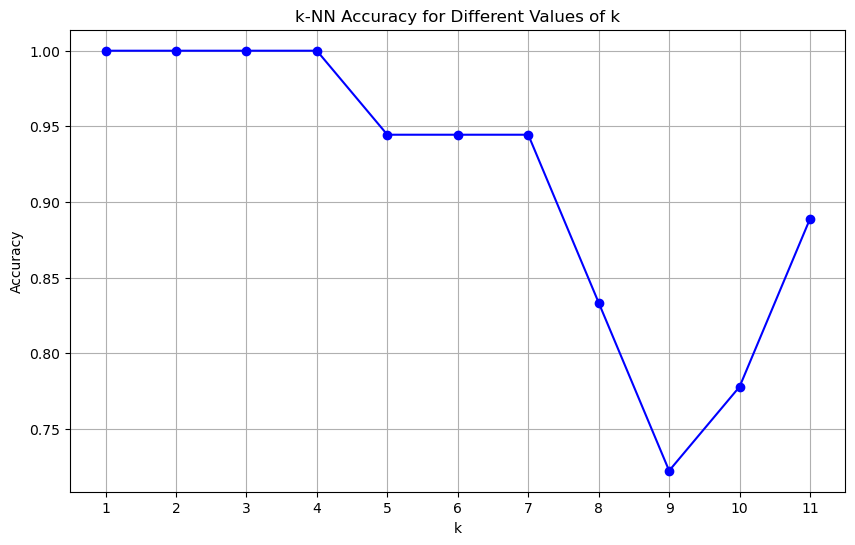

In [40]:


import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
 
# Load the dataset

file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel(file_path)
 
# Identify the class label column and feature columns

class_column = data.columns[-1]

feature_columns = data.columns[:-1]
 
# Get the unique classes in the dataset

unique_classes = data[class_column].unique()
 
# Filter the dataset to include only the first two classes

filtered_data = data[data[class_column].isin(unique_classes[:2])]
 
# Separate features and labels

X = filtered_data[feature_columns].values

y = filtered_data[class_column].values
 
# Split the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
# Standardize the features (important for kNN)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
 
# List to store accuracy results

accuracy_results = []
 
# Iterate over different values of k (from 1 to 11)

for k in range(1, 12):

    # Create the kNN classifier with the current value of k

    neigh = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier

    neigh.fit(X_train, y_train)

    # Test the classifier and get the accuracy

    accuracy = neigh.score(X_test, y_test)

    # Store the accuracy result

    accuracy_results.append(accuracy)
 
    print(f"Accuracy with k={k}: {accuracy:.2f}")
 
# Plot the accuracy results

plt.figure(figsize=(10, 6))

plt.plot(range(1, 12), accuracy_results, marker='o', linestyle='-', color='b')

plt.title('k-NN Accuracy for Different Values of k')

plt.xlabel('k')

plt.ylabel('Accuracy')

plt.xticks(range(1, 12))

plt.grid(True)

plt.show()

 

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
 
# Load the dataset
file_path = "C:/Users/year3/Downloads/dataset.xlsx"
data = pd.read_excel(file_path)
 
# Identify the class label column and feature columns
class_column = data.columns[-1]
feature_columns = data.columns[:-1]
 
# Get the unique classes in the dataset
unique_classes = data[class_column].unique()
 
# Filter the dataset to include only the first two classes
filtered_data = data[data[class_column].isin(unique_classes[:2])]
 
# Separate features and labels
X = filtered_data[feature_columns].values
y = filtered_data[class_column].values
 
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
# Standardize the features (important for kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Create the kNN classifier with a chosen k, e.g., k=3
neigh = KNeighborsClassifier(n_neighbors=3)
 
# Train the classifier
neigh.fit(X_train, y_train)
 
# Predict on both training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)
 
# Calculate the confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):\n", conf_matrix_train)
 
# Calculate the confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)
 
# Calculate and print classification report (precision, recall, F1-score) for training data
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))
 
# Calculate and print classification report (precision, recall, F1-score) for test data
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
 
# Evaluate the model's learning outcome based on the metrics
train_accuracy = neigh.score(X_train, y_train)
test_accuracy = neigh.score(X_test, y_test)
 
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
 
if train_accuracy > test_accuracy:
    if test_accuracy < 0.70:  # Assuming a threshold for significant performance drop
        print("The model may be overfitting.")
    else:
        print("The model is well-fitted.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model is well-fitted.")

Confusion Matrix (Training Data):
 [[41  0]
 [ 0 30]]
Confusion Matrix (Test Data):
 [[11  0]
 [ 0  7]]
Classification Report (Training Data):
              precision    recall  f1-score   support

        3333       1.00      1.00      1.00        41
        3334       1.00      1.00      1.00        30

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Classification Report (Test Data):
              precision    recall  f1-score   support

        3333       1.00      1.00      1.00        11
        3334       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Training Accuracy: 1.00
Test Accuracy: 1.00
The model is well-fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim